## Paqueterías 

In [1]:
import pandas as pd
import pandasql as ps
from urllib.request import urlopen
import urllib.request
import requests
import time 
import numpy as np
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
from IPython.display import display,HTML

In [2]:
aux=pd.DataFrame()

In [3]:
aux.to_excel("df_palaciodehierro.xlsx",index=False)
aux.to_excel("df_sears.xlsx",index=False)
aux.to_excel("df_shein.xlsx",index=False)

# Web Scraper

### Palacio de Hierro

In [4]:
def Buscador_PalaciodeHierro(producto):
    
    ### ingresamos a la pagina web 
    path ="C:\webdriver\chromedriver.exe"            
    #path= mipath
    driver=webdriver.Chrome(path)
    url= "https://www.elpalaciodehierro.com/buscar?q="+producto
    driver.get(url)
    
    ####### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    

    productos= driver.find_elements_by_class_name("b-product")
    
    ### accedemos a las urls almacenadas en la variable productos

    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    ### accedemos a los nombres de los productos

    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)
            
            
    ### accedemos a los precios base y promo de los productos 

    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("b-product_price-value")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("b-product_price-value")[1].text)
        except:
            lista_promos.append(np.nan)





    df_palaciodehierro =pd.DataFrame({"nombre":lista_nombres,"url":lista_urls,"precio1":lista_precios,"precio2":lista_promos})
    df_palaciodehierro["autoservicio"]="Palacio de Hierro"
    df_palaciodehierro["marca"]= producto
    df_palaciodehierro["fecha"]= time.strftime("%d/%m/%y")

    df_palaciodehierro = df_palaciodehierro[["fecha","autoservicio","marca","nombre","url","precio1","precio2"]]
    ## este filtro apenas se agrega

    
    df_palaciodehierro  =df_palaciodehierro.reset_index(drop=True)



    datos_webscraper=pd.read_excel("df_palaciodehierro.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_palaciodehierro],axis=0)

    datos_webscraper.to_excel("df_palaciodehierro.xlsx",index=False)

    driver.quit()
    return df_palaciodehierro

### SEARS

In [5]:
def buscador_SEARS(producto):
    
    path ="C:\webdriver\chromedriver.exe"
    #path= mipath
    driver=webdriver.Chrome(path)
    url= "https://www.sears.com.mx/resultados/q="+producto+"/pagina=1"
    driver.get(url)
    
    productos= driver.find_elements_by_class_name("cardProduct")
    
    lista_urls=list()
    for i in range(len(productos)):  
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
                
        
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("h4")[0].text)
        except:
            lista_nombres.append(np.nan)
            
            
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("precio1")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("priceDiscountContent")[0].text)
        except:
            lista_promos.append(np.nan)
            
            
   
    
    df_sears = pd.DataFrame({"autoservicio":"Sears","marca":producto,"nombre":lista_nombres,"url":lista_urls,"precio1":lista_promos,"precio2":lista_precios})
    df_sears["fecha"]= time.strftime("%d/%m/%y")
    df_sears = df_sears[["fecha","autoservicio","marca","nombre","url","precio1","precio2"]]
    
    df_sears = df_sears.reset_index(drop=True)
    
    datos_webscraper=pd.read_excel("df_sears.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_sears],axis=0)

    datos_webscraper.to_excel("df_sears.xlsx",index=False)
    
    #df_sears = df_sears.drop_duplicates(keep="last")
    
    driver.quit()
    
    return df_sears

### SHEIN

In [6]:
def BuscadorDePreciosShein(producto):
    path ="C:\webdriver\chromedriver.exe"
    driver= webdriver.Chrome(path)
    url= "https://www.shein.com.mx/pdsearch/"+producto+"/?ici=s1`EditSearch`"+producto+"`_fb`d0`PageHome&scici=Search~~EditSearch~~1~~"+producto+"~~~~0"
    driver.get(url)
    productos= driver.find_elements_by_class_name("S-product-item__info")
    
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[0].text)
        except:
            lista_nombres.append(np.nan)
            
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("S-product-item__retail-price")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("S-product-item__sale-price")[0].text)
        except:
            lista_promos.append(np.nan)
            
    
    df_shein=pd.DataFrame({"Nombre":lista_nombres,"URL":lista_urls,"Precio1":lista_precios,"Precio2":lista_promos})
    df_shein["Autoservicio"]="Shein"
    df_shein["Producto"]= producto
    df_shein["Fecha"]= time.strftime("%d/%m/%y")
    
    df_shein = df_shein[["Fecha","Autoservicio","Producto","Nombre","URL","Precio1","Precio2"]]
    df_shein= df_shein.reset_index(drop=True)
    datos_webscraper=pd.read_excel("df_shein.xlsx")
    datos_webscraper= pd.concat([datos_webscraper,df_shein],axis=0)
    datos_webscraper.to_excel("df_shein.xlsx",index=False)
    
    driver.quit()
    return df_shein

# Búsqueda de los productos en los sitios correspondientes

### Búsqueda de productos Palacio de Hierro

In [7]:
for productos in ["gorra","playera","suéter","chamarra"]:
    Buscador_PalaciodeHierro(productos)

<ipython-input-4-9cf9fcd37d24>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-4-9cf9fcd37d24>:13: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("b-product")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464: UserWarnin

In [8]:
df_palaciodehierro=pd.read_excel("df_palaciodehierro.xlsx")
df_palaciodehierro

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,"$1,300.00",$780.00
1,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,"$1,200.00",$720.00
2,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/polo-ralph-l...,"$1,390.00",$834.00
3,28/01/22,Palacio de Hierro,gorra,Gorra,https://www.elpalaciodehierro.com/speedo-gorra...,$199.00,NaN
4,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/armani-excha...,"$1,200.00",NaN
...,...,...,...,...,...,...,...
199,28/01/22,Palacio de Hierro,chamarra,Chamarra Mujer,https://www.elpalaciodehierro.com/julio-chamar...,"$2,199.00","$1,539.30"
200,28/01/22,Palacio de Hierro,chamarra,Chamarra acolchada Hombre,https://www.elpalaciodehierro.com/catamaran-ch...,$799.00,$559.30
201,28/01/22,Palacio de Hierro,chamarra,Chamarra de mezclilla con capucha Mujer,https://www.elpalaciodehierro.com/desigual-cha...,"$3,690.00","$2,214.00"
202,28/01/22,Palacio de Hierro,chamarra,Chamarra Impermeable con Capucha Mujer,https://www.elpalaciodehierro.com/michael-mich...,"$5,490.00",NaN


### Búsqueda de productos SEARS

In [9]:
buscador_SEARS("gorra")

<ipython-input-5-018a8b178480>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-5-018a8b178480>:9: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("cardProduct")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,gorra,Gorra Puma,https://www.sears.com.mx/producto/1008726/gorr...,,$449MXN
1,28/01/22,Sears,gorra,Gorra Puma Unisex,https://www.sears.com.mx/producto/343835/gorra...,$349 MXN,$279MXN
2,28/01/22,Sears,gorra,Gorra Training Adidas para Caballero,https://www.sears.com.mx/producto/319986/gorra...,,$349MXN
3,28/01/22,Sears,gorra,Gorra Under Armour para Caballero,https://www.sears.com.mx/producto/2005082/gorr...,,$449MXN
4,28/01/22,Sears,gorra,Gorra Azul Marino Casual Puma - Unisex,https://www.sears.com.mx/producto/234193/gorra...,$499 MXN,$149MXN
...,...,...,...,...,...,...,...
95,28/01/22,Sears,gorra,Chamarra Gorra Y Cierre Bruno Magnani Bm252475...,https://www.sears.com.mx/producto/2000662/cham...,"$2,199 MXN","$1,099MXN"
96,28/01/22,Sears,gorra,Chamarra Verde Doble Vista con Gorra Elle para...,https://www.sears.com.mx/producto/186804/chama...,"$1,399 MXN",$699MXN
97,28/01/22,Sears,gorra,Gorra para Natación Roja Voit - Infantil,https://www.sears.com.mx/producto/119927/gorra...,,$149MXN
98,28/01/22,Sears,gorra,Chamarra Pelo en Gorra Bruno Magnani Bm252435A...,https://www.sears.com.mx/producto/2000661/cham...,"$1,899 MXN",$949MXN


In [10]:
buscador_SEARS("sueter")

<ipython-input-5-018a8b178480>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-5-018a8b178480>:9: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("cardProduct")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,sueter,Sueter Corbata Philosophy Jr Plus,https://www.sears.com.mx/producto/276729/suete...,,$649MXN
1,28/01/22,Sears,sueter,Sueter Manga Ranglan Davinchy,https://www.sears.com.mx/producto/276752/suete...,,$899MXN
2,28/01/22,Sears,sueter,Sueter Tejido Largo Arqueology,https://www.sears.com.mx/producto/235305/suete...,$549 MXN,$269MXN
3,28/01/22,Sears,sueter,Sueter Bf Bicicleta Zucca,https://www.sears.com.mx/producto/1229139/suet...,$599 MXN,$399MXN
4,28/01/22,Sears,sueter,Sueter Largo Arqueology,https://www.sears.com.mx/producto/235309/suete...,,$599MXN
...,...,...,...,...,...,...,...
95,28/01/22,Sears,sueter,Suéter Dockers Core &frac14; Zip Sweater Docke...,https://www.sears.com.mx/producto/1209217/su-e...,"$1,090 MXN",$759MXN
96,28/01/22,Sears,sueter,Suéter Animal Print Zucca,https://www.sears.com.mx/producto/1209242/su-e...,$649 MXN,$519MXN
97,28/01/22,Sears,sueter,Suéter con Aplicación Zucca,https://www.sears.com.mx/producto/1209250/su-e...,$549 MXN,$439MXN
98,28/01/22,Sears,sueter,Suéter Cruzo Manga Larga para Niña,https://www.sears.com.mx/producto/1229091/su-e...,$199 MXN,$129MXN


In [12]:
buscador_SEARS("playera")

<ipython-input-5-018a8b178480>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-5-018a8b178480>:9: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("cardProduct")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,playera,Playera Cruzada Baby Creysi,https://www.sears.com.mx/producto/68927/player...,$129 MXN,$103MXN
1,28/01/22,Sears,playera,Playera Liberia Everlast para Caballero,https://www.sears.com.mx/producto/220829/playe...,,$349MXN
2,28/01/22,Sears,playera,Playera Running Studio Puma,https://www.sears.com.mx/producto/196547/playe...,$599 MXN,$179MXN
3,28/01/22,Sears,playera,Playera Sin Mangas Jeanious para Dama,https://www.sears.com.mx/producto/213950/playe...,$399 MXN,$119MXN
4,28/01/22,Sears,playera,Playera Puma para Caballero,https://www.sears.com.mx/producto/343876/playe...,$449 MXN,$359MXN
...,...,...,...,...,...,...,...
95,28/01/22,Sears,playera,Playera Yongster Modelo B13B609 para Caballero,https://www.sears.com.mx/producto/834080/playe...,,$249MXN
96,28/01/22,Sears,playera,Playera Lisa de Manga Corta Limoncello,https://www.sears.com.mx/producto/237498/playe...,$249 MXN,$99MXN
97,28/01/22,Sears,playera,Playera For Intelligent Trainers para Dama,https://www.sears.com.mx/producto/238382/playe...,$299 MXN,$179MXN
98,28/01/22,Sears,playera,Playera Blanca Casual Puma para Dama,https://www.sears.com.mx/producto/222182/playe...,$399 MXN,$239MXN


In [13]:
buscador_SEARS("chamarra")

<ipython-input-5-018a8b178480>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-5-018a8b178480>:9: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("cardProduct")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,chamarra,Chamarra Reversible Philosophy Jr,https://www.sears.com.mx/producto/1227418/cham...,,"$1,199MXN"
1,28/01/22,Sears,chamarra,Chamarra con Bolsas Fukka para Dama,https://www.sears.com.mx/producto/168489/chama...,"$1,229 MXN",$489MXN
2,28/01/22,Sears,chamarra,Chamarra de Mezclilla Levis para Dama,https://www.sears.com.mx/producto/185476/chama...,"$1,690 MXN","$1,009MXN"
3,28/01/22,Sears,chamarra,Chamarra Denim Dex para Dama,https://www.sears.com.mx/producto/313054/chama...,"$1,659 MXN",$489MXN
4,28/01/22,Sears,chamarra,Chamarra Original Trucker Levis,https://www.sears.com.mx/producto/404981/chama...,,"$1,799MXN"
...,...,...,...,...,...,...,...
95,28/01/22,Sears,chamarra,Chamarra Cuello Mao Philosophy Jr,https://www.sears.com.mx/producto/1227421/cham...,,$999MXN
96,28/01/22,Sears,chamarra,Abrigo a Cuadros Jeanious,https://www.sears.com.mx/producto/1225805/abri...,,"$1,099MXN"
97,28/01/22,Sears,chamarra,Sudadera Cuello Alto,https://www.sears.com.mx/producto/1225669/suda...,,$329MXN
98,28/01/22,Sears,chamarra,Chamarra Cuello Camisero Diseño Mezclilla Elle,https://www.sears.com.mx/producto/2003744/cham...,,$899MXN


### Búsqueda de productos SHEIN

In [14]:
for productos in ["gorra","sueter","playera","chamarra"]:
    BuscadorDePreciosShein(productos)

<ipython-input-6-f59f0b18b65d>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver= webdriver.Chrome(path)
<ipython-input-6-f59f0b18b65d>:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("S-product-item__info")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
C:\Users\mgbom\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464:

In [15]:
df_shein=pd.read_excel("df_shein.xlsx")
df_shein

,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,gorra,Niñitas Gorra con bordado de letra,https://www.shein.com.mx/Toddler-Girls-Letter-...,$MXN129.00,NaN
1,28/01/22,Shein,gorra,Gorra de béisbol con estampado de animal,https://www.shein.com.mx/Animal-Print-Baseball...,$MXN130.00,NaN
2,28/01/22,Shein,gorra,Hombres Gorra de béisbol con patrón de letra,https://www.shein.com.mx/Men-Letter-Pattern-Ba...,$MXN130.00,NaN
3,28/01/22,Shein,gorra,Hombres Gorra de béisbol animal con bordado,https://www.shein.com.mx/Men-Animal-Embroidere...,$MXN145.00,NaN
4,28/01/22,Shein,gorra,Hombres Gorra de béisbol fuego con bordado,https://www.shein.com.mx/Men-Fire-Embroidery-B...,$MXN145.00,NaN
...,...,...,...,...,...,...,...
475,28/01/22,Shein,chamarra,Hombres Cazadora con estampado de letra con di...,https://www.shein.com.mx/Men-Letter-Graphic-Pa...,$MXN879.00,$MXN468.00
476,28/01/22,Shein,chamarra,SHEIN Hombres Cazadora unicolor con cremallera,https://www.shein.com.mx/SHEIN-Men-Solid-Zippe...,$MXN401.00,NaN
477,28/01/22,Shein,chamarra,Hombres Cazadora con parche con bolsillo con s...,https://www.shein.com.mx/Men-Patched-Flap-Pock...,"$MXN1,450.00",NaN
478,28/01/22,Shein,chamarra,Niñitas Cazadora tipo bomber con parche de let...,https://www.shein.com.mx/Toddler-Girls-Letter-...,$MXN330.00,$MXN264.00


# Conversión de precios a tipo float

### Consersión de precios Palacio de Hierro

In [16]:
def precios_floats(datos):

        
    #### eliminamos el signo de pesos de ambas columnas
    
    for i in range(len(datos["precio1"])):
        try:
            datos["precio1"].iloc[i]=datos["precio1"].iloc[i].strip("$")
        except:
            pass
        
    for i in range(len(datos["precio2"])):
        try:
            datos["precio2"].iloc[i]=datos["precio2"].iloc[i].strip("$")
        except:
            pass
        
    
    ### quitamos la separacion de comas para miles
    
    datos["precio1"]=datos["precio1"].replace(",","",regex=True)
    datos["precio2"]=datos["precio2"].replace(",","",regex=True)
    
     
        
    ### convertimos los precios a numericos    
    datos['precio1'] = pd.to_numeric(datos['precio1'], errors='coerce')
    datos['precio2'] = pd.to_numeric(datos['precio2'], errors='coerce')

    
    
    datos.to_excel("df_palaciodehierro_limpio.xlsx",index=False)
        
     ### visualizamos los tipos de datos
    print(datos.dtypes)
    return datos

In [17]:
precios_floats(df_palaciodehierro)

fecha            object
autoservicio     object
marca            object
nombre           object
url              object
precio1         float64
precio2         float64
dtype: object


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,1300.0,780.0
1,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,1200.0,720.0
2,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/polo-ralph-l...,1390.0,834.0
3,28/01/22,Palacio de Hierro,gorra,Gorra,https://www.elpalaciodehierro.com/speedo-gorra...,199.0,NaN
4,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/armani-excha...,1200.0,NaN
...,...,...,...,...,...,...,...
199,28/01/22,Palacio de Hierro,chamarra,Chamarra Mujer,https://www.elpalaciodehierro.com/julio-chamar...,2199.0,1539.3
200,28/01/22,Palacio de Hierro,chamarra,Chamarra acolchada Hombre,https://www.elpalaciodehierro.com/catamaran-ch...,799.0,559.3
201,28/01/22,Palacio de Hierro,chamarra,Chamarra de mezclilla con capucha Mujer,https://www.elpalaciodehierro.com/desigual-cha...,3690.0,2214.0
202,28/01/22,Palacio de Hierro,chamarra,Chamarra Impermeable con Capucha Mujer,https://www.elpalaciodehierro.com/michael-mich...,5490.0,NaN


In [18]:
df_palaciodehierro=pd.read_excel("df_palaciodehierro_limpio.xlsx")
df_palaciodehierro

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,1300,780.0
1,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,1200,720.0
2,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/polo-ralph-l...,1390,834.0
3,28/01/22,Palacio de Hierro,gorra,Gorra,https://www.elpalaciodehierro.com/speedo-gorra...,199,NaN
4,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/armani-excha...,1200,NaN
...,...,...,...,...,...,...,...
199,28/01/22,Palacio de Hierro,chamarra,Chamarra Mujer,https://www.elpalaciodehierro.com/julio-chamar...,2199,1539.3
200,28/01/22,Palacio de Hierro,chamarra,Chamarra acolchada Hombre,https://www.elpalaciodehierro.com/catamaran-ch...,799,559.3
201,28/01/22,Palacio de Hierro,chamarra,Chamarra de mezclilla con capucha Mujer,https://www.elpalaciodehierro.com/desigual-cha...,3690,2214.0
202,28/01/22,Palacio de Hierro,chamarra,Chamarra Impermeable con Capucha Mujer,https://www.elpalaciodehierro.com/michael-mich...,5490,NaN


### Conversión de precios SEARS

In [19]:
def precios_floats(datos):

        
    #### eliminamos el signo de pesos de ambas columnas
    
    for i in range(len(datos["precio1"])):
        try:
            datos["precio1"].iloc[i]=datos["precio1"].iloc[i].strip("$")
        except:
            pass
        
    for i in range(len(datos["precio2"])):
        try:
            datos["precio2"].iloc[i]=datos["precio2"].iloc[i].strip("$")
        except:
            pass
    
    for i in range(len(datos["precio1"])):
        try:
            datos["precio1"].iloc[i]=datos["precio1"].iloc[i].strip("MXN")
        except:
            pass
        
    for i in range(len(datos["precio2"])):
        try:
            datos["precio2"].iloc[i]=datos["precio2"].iloc[i].strip("MXN")
        except:
            pass
        
    
    ### quitamos la separacion de comas para miles
    
    datos["precio1"]=datos["precio1"].replace(",","",regex=True)
    datos["precio2"]=datos["precio2"].replace(",","",regex=True)
    
     
        
    ### convertimos los precios a numericos    
    datos['precio1'] = pd.to_numeric(datos['precio1'], errors='coerce')
    datos['precio2'] = pd.to_numeric(datos['precio2'], errors='coerce')

    
    
    datos.to_excel("df_sears_limpio.xlsx",index=False)
        
     ### visualizamos los tipos de datos
    print(datos.dtypes)
    return datos

In [20]:
df_sears=pd.read_excel("df_sears.xlsx")

In [21]:
precios_floats(df_sears)

fecha            object
autoservicio     object
marca            object
nombre           object
url              object
precio1         float64
precio2           int64
dtype: object


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,gorra,Gorra Puma,https://www.sears.com.mx/producto/1008726/gorr...,NaN,449
1,28/01/22,Sears,gorra,Gorra Puma Unisex,https://www.sears.com.mx/producto/343835/gorra...,349.0,279
2,28/01/22,Sears,gorra,Gorra Training Adidas para Caballero,https://www.sears.com.mx/producto/319986/gorra...,NaN,349
3,28/01/22,Sears,gorra,Gorra Under Armour para Caballero,https://www.sears.com.mx/producto/2005082/gorr...,NaN,449
4,28/01/22,Sears,gorra,Gorra Azul Marino Casual Puma - Unisex,https://www.sears.com.mx/producto/234193/gorra...,499.0,149
...,...,...,...,...,...,...,...
395,28/01/22,Sears,chamarra,Chamarra Cuello Mao Philosophy Jr,https://www.sears.com.mx/producto/1227421/cham...,NaN,999
396,28/01/22,Sears,chamarra,Abrigo a Cuadros Jeanious,https://www.sears.com.mx/producto/1225805/abri...,NaN,1099
397,28/01/22,Sears,chamarra,Sudadera Cuello Alto,https://www.sears.com.mx/producto/1225669/suda...,NaN,329
398,28/01/22,Sears,chamarra,Chamarra Cuello Camisero Diseño Mezclilla Elle,https://www.sears.com.mx/producto/2003744/cham...,NaN,899


In [22]:
df_sears=pd.read_excel("df_sears_limpio.xlsx")
df_sears

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,gorra,Gorra Puma,https://www.sears.com.mx/producto/1008726/gorr...,NaN,449
1,28/01/22,Sears,gorra,Gorra Puma Unisex,https://www.sears.com.mx/producto/343835/gorra...,349.0,279
2,28/01/22,Sears,gorra,Gorra Training Adidas para Caballero,https://www.sears.com.mx/producto/319986/gorra...,NaN,349
3,28/01/22,Sears,gorra,Gorra Under Armour para Caballero,https://www.sears.com.mx/producto/2005082/gorr...,NaN,449
4,28/01/22,Sears,gorra,Gorra Azul Marino Casual Puma - Unisex,https://www.sears.com.mx/producto/234193/gorra...,499.0,149
...,...,...,...,...,...,...,...
395,28/01/22,Sears,chamarra,Chamarra Cuello Mao Philosophy Jr,https://www.sears.com.mx/producto/1227421/cham...,NaN,999
396,28/01/22,Sears,chamarra,Abrigo a Cuadros Jeanious,https://www.sears.com.mx/producto/1225805/abri...,NaN,1099
397,28/01/22,Sears,chamarra,Sudadera Cuello Alto,https://www.sears.com.mx/producto/1225669/suda...,NaN,329
398,28/01/22,Sears,chamarra,Chamarra Cuello Camisero Diseño Mezclilla Elle,https://www.sears.com.mx/producto/2003744/cham...,NaN,899


### Conversión de precios SHEIN

In [29]:
def precios_floats(datos):

        
    #### eliminamos el signo de pesos de ambas columnas
    
    for i in range(len(datos["Precio1"])):
        try:
            datos["Precio1"].iloc[i]=datos["Precio1"].iloc[i].strip("$MXN")
        except:
            pass
        
    for i in range(len(datos["Precio2"])):
        try:
            datos["Precio2"].iloc[i]=datos["Precio2"].iloc[i].strip("$MXN")
        except:
            pass

        
    
    ### quitamos la separacion de comas para miles
    
    datos["Precio1"]=datos["Precio1"].replace(",","",regex=True)
    datos["Precio2"]=datos["Precio2"].replace(",","",regex=True)
    
     
        
    ### convertimos los precios a numericos    
    datos['Precio1'] = pd.to_numeric(datos['Precio1'], errors='coerce')
    datos['Precio2'] = pd.to_numeric(datos['Precio2'], errors='coerce')

    
    
    datos.to_excel("df_shein_limpio.xlsx",index=False)
        
     ### visualizamos los tipos de datos
    print(datos.dtypes)
    return datos

In [30]:
df_shein=pd.read_excel("df_shein.xlsx")

In [31]:
precios_floats(df_shein)

Fecha            object
Autoservicio     object
Producto         object
Nombre           object
URL              object
Precio1         float64
Precio2         float64
dtype: object


,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,gorra,Niñitas Gorra con bordado de letra,https://www.shein.com.mx/Toddler-Girls-Letter-...,129.0,NaN
1,28/01/22,Shein,gorra,Gorra de béisbol con estampado de animal,https://www.shein.com.mx/Animal-Print-Baseball...,130.0,NaN
2,28/01/22,Shein,gorra,Hombres Gorra de béisbol con patrón de letra,https://www.shein.com.mx/Men-Letter-Pattern-Ba...,130.0,NaN
3,28/01/22,Shein,gorra,Hombres Gorra de béisbol animal con bordado,https://www.shein.com.mx/Men-Animal-Embroidere...,145.0,NaN
4,28/01/22,Shein,gorra,Hombres Gorra de béisbol fuego con bordado,https://www.shein.com.mx/Men-Fire-Embroidery-B...,145.0,NaN
...,...,...,...,...,...,...,...
475,28/01/22,Shein,chamarra,Hombres Cazadora con estampado de letra con di...,https://www.shein.com.mx/Men-Letter-Graphic-Pa...,879.0,468.0
476,28/01/22,Shein,chamarra,SHEIN Hombres Cazadora unicolor con cremallera,https://www.shein.com.mx/SHEIN-Men-Solid-Zippe...,401.0,NaN
477,28/01/22,Shein,chamarra,Hombres Cazadora con parche con bolsillo con s...,https://www.shein.com.mx/Men-Patched-Flap-Pock...,1450.0,NaN
478,28/01/22,Shein,chamarra,Niñitas Cazadora tipo bomber con parche de let...,https://www.shein.com.mx/Toddler-Girls-Letter-...,330.0,264.0


In [32]:
df_shein=pd.read_excel("df_shein_limpio.xlsx")
df_shein

,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,gorra,Niñitas Gorra con bordado de letra,https://www.shein.com.mx/Toddler-Girls-Letter-...,129,NaN
1,28/01/22,Shein,gorra,Gorra de béisbol con estampado de animal,https://www.shein.com.mx/Animal-Print-Baseball...,130,NaN
2,28/01/22,Shein,gorra,Hombres Gorra de béisbol con patrón de letra,https://www.shein.com.mx/Men-Letter-Pattern-Ba...,130,NaN
3,28/01/22,Shein,gorra,Hombres Gorra de béisbol animal con bordado,https://www.shein.com.mx/Men-Animal-Embroidere...,145,NaN
4,28/01/22,Shein,gorra,Hombres Gorra de béisbol fuego con bordado,https://www.shein.com.mx/Men-Fire-Embroidery-B...,145,NaN
...,...,...,...,...,...,...,...
475,28/01/22,Shein,chamarra,Hombres Cazadora con estampado de letra con di...,https://www.shein.com.mx/Men-Letter-Graphic-Pa...,879,468.0
476,28/01/22,Shein,chamarra,SHEIN Hombres Cazadora unicolor con cremallera,https://www.shein.com.mx/SHEIN-Men-Solid-Zippe...,401,NaN
477,28/01/22,Shein,chamarra,Hombres Cazadora con parche con bolsillo con s...,https://www.shein.com.mx/Men-Patched-Flap-Pock...,1450,NaN
478,28/01/22,Shein,chamarra,Niñitas Cazadora tipo bomber con parche de let...,https://www.shein.com.mx/Toddler-Girls-Letter-...,330,264.0


# Lista completa de productos según el sitio

### Productos Palacio de Hierro

In [33]:
df_palaciodehierro=pd.read_excel("df_palaciodehierro_limpio.xlsx")
display(HTML(df_palaciodehierro.to_html()))

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-exchange-gorra-mujer-41773158.html,1300,780.0
1,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-exchange-gorra-mujer-41773160.html,1200,720.0
2,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/polo-ralph-lauren-gorra-hombre-41920604.html,1390,834.0
3,28/01/22,Palacio de Hierro,gorra,Gorra,https://www.elpalaciodehierro.com/speedo-gorra-35803189.html,199,NaN
4,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/armani-exchange-gorra-hombre-40931148.html,1200,NaN
5,28/01/22,Palacio de Hierro,gorra,Gorra,https://www.elpalaciodehierro.com/under-armour-gorra-38804463.html,499,NaN
6,28/01/22,Palacio de Hierro,gorra,Gorra Unisex,https://www.elpalaciodehierro.com/adidas-gorra-unisex-41318318.html,699,NaN
7,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/armani-exchange-gorra-hombre-41479087.html,980,NaN
8,28/01/22,Palacio de Hierro,gorra,Gorra Motosport Unisex,https://www.elpalaciodehierro.com/puma-gorra-motosport-unisex-41300653.html,749,524.3
9,28/01/22,Palacio de Hierro,gorra,Gorra Kansas City Chiefs 3930,https://www.elpalaciodehierro.com/new-era-gorra-kansas-city-chiefs-3930-41876098.html,699,NaN


### Productos SEARS

In [34]:
df_sears=pd.read_excel("df_sears_limpio.xlsx")
display(HTML(df_sears.to_html()))

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,gorra,Gorra Puma,https://www.sears.com.mx/producto/1008726/gorra-puma/,NaN,449
1,28/01/22,Sears,gorra,Gorra Puma Unisex,https://www.sears.com.mx/producto/343835/gorra-puma-unisex/,349.0,279
2,28/01/22,Sears,gorra,Gorra Training Adidas para Caballero,https://www.sears.com.mx/producto/319986/gorra-training-adidas-para-caballero/,NaN,349
3,28/01/22,Sears,gorra,Gorra Under Armour para Caballero,https://www.sears.com.mx/producto/2005082/gorra-under-armour-para-caballero/,NaN,449
4,28/01/22,Sears,gorra,Gorra Azul Marino Casual Puma - Unisex,https://www.sears.com.mx/producto/234193/gorra-azul-marino-casual-puma-unisex/,499.0,149
5,28/01/22,Sears,gorra,Gorra Gris Under Armour - Caballero,https://www.sears.com.mx/producto/215206/gorra-gris-under-armour-caballero/,NaN,499
6,28/01/22,Sears,gorra,Gorra Blanca Casual Puma - Unisex,https://www.sears.com.mx/producto/295189/gorra-blanca-casual-puma-unisex/,NaN,349
7,28/01/22,Sears,gorra,Gorra Unisex Running Cap Iii Puma,https://www.sears.com.mx/producto/158930/gorra-unisex-running-cap-iii-puma/,399.0,119
8,28/01/22,Sears,gorra,Gorra Boston Red Sox New Era,https://www.sears.com.mx/producto/220943/gorra-boston-red-sox-new-era/,NaN,699
9,28/01/22,Sears,gorra,Gorra Training Under Armour - Caballero,https://www.sears.com.mx/producto/139910/gorra-training-under-armour-caballero/,449.0,269


### Productos SHEIN

In [35]:
df_shein=pd.read_excel("df_shein_limpio.xlsx")
display(HTML(df_shein.to_html()))

,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,gorra,Niñitas Gorra con bordado de letra,https://www.shein.com.mx/Toddler-Girls-Letter-Embroidered-Snapback-Cap-p-3117171-cat-2070.html?scici=Search~~EditSearch~~1~~gorra~~~~0,129,NaN
1,28/01/22,Shein,gorra,Gorra de béisbol con estampado de animal,https://www.shein.com.mx/Animal-Print-Baseball-Cap-p-8603342-cat-1772.html?scici=Search~~EditSearch~~1~~gorra~~~~0,130,NaN
2,28/01/22,Shein,gorra,Hombres Gorra de béisbol con patrón de letra,https://www.shein.com.mx/Men-Letter-Pattern-Baseball-Cap-p-7827392-cat-2136.html?scici=Search~~EditSearch~~1~~gorra~~~~0,130,NaN
3,28/01/22,Shein,gorra,Hombres Gorra de béisbol animal con bordado,https://www.shein.com.mx/Men-Animal-Embroidered-Baseball-Cap-p-7822947-cat-2136.html?scici=Search~~EditSearch~~1~~gorra~~~~0,145,NaN
4,28/01/22,Shein,gorra,Hombres Gorra de béisbol fuego con bordado,https://www.shein.com.mx/Men-Fire-Embroidery-Baseball-Cap-p-7990342-cat-2136.html?scici=Search~~EditSearch~~1~~gorra~~~~0,145,NaN
5,28/01/22,Shein,gorra,Niñitos Gorra de béisbol con diseño bordado,https://www.shein.com.mx/Toddler-Kids-Embroidery-Detail-Baseball-Cap-p-8433802-cat-2070.html?scici=Search~~EditSearch~~1~~gorra~~~~0,136,NaN
6,28/01/22,Shein,gorra,3 piezas gorro béisbol minimalista,https://www.shein.com.mx/3pcs-Minimalist-Baseball-Cap-p-2223539-cat-1772.html?scici=Search~~EditSearch~~1~~gorra~~~~0,184,164.0
7,28/01/22,Shein,gorra,Otros accesorios,https://www.shein.com.mx/Letter-Graphic-Baseball-Cap-p-2851990-cat-1772.html?scici=Search~~EditSearch~~1~~gorra~~~~0,110,88.0
8,28/01/22,Shein,gorra,Gorro béisbol con bordado de letra,https://www.shein.com.mx/Letter-Embroidery-Baseball-Cap-p-2874168-cat-1772.html?scici=Search~~EditSearch~~1~~gorra~~~~0,110,88.0
9,28/01/22,Shein,gorra,Otros accesorios,https://www.shein.com.mx/Heart-Print-Baseball-Cap-p-2917373-cat-1772.html?scici=Search~~EditSearch~~1~~gorra~~~~0,90,53.0


# Consultas SQL

## Consultas Palacio de Hierro

#### Promedio del precio de oferta de cada producto

In [36]:
ps.sqldf("select marca, avg(precio2) as Promediooferta from df_palaciodehierro group by marca ")

,marca,Promediooferta
0,chamarra,2421.762162
1,gorra,827.618750
2,playera,2108.961538
3,suéter,1108.017647


#### Promedio del precio original de cada producto

In [38]:
ps.sqldf("select marca, avg(precio1) as preciopromedio from df_palaciodehierro group by marca ")

,marca,preciopromedio
0,chamarra,8431.764706
1,gorra,1142.647059
2,playera,1686.941176
3,suéter,2683.352941


#### Precio mímimo y máximo de cada producto

In [39]:
ps.sqldf("SELECT marca, MIN(precio2) AS Minprecio, MAX(precio1) AS Maxprecio FROM df_palaciodehierro GROUP BY marca; ")

,marca,Minprecio,Maxprecio
0,chamarra,359.7,82400
1,gorra,343.0,9950
2,playera,359.7,16890
3,suéter,179.5,40690


#### Artículo más caro sin descuento

In [41]:
ps.sqldf("SELECT * FROM df_palaciodehierro where precio1  =  (SELECT max(precio1) FROM df_palaciodehierro) ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,chamarra,Chaqueta blouson De Napa Hombre,https://www.elpalaciodehierro.com/salvatore-fe...,82400,None


#### Artículo más caro con descuento

In [42]:
ps.sqldf("SELECT * FROM df_palaciodehierro where precio2  =  (SELECT max(precio2) FROM df_palaciodehierro) ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,playera,Playera estampada Hombre,https://www.elpalaciodehierro.com/gianni-versa...,16890,10134.0


#### Artículo más barato con descuento

In [43]:
ps.sqldf("SELECT * FROM df_palaciodehierro where precio2 =  (SELECT MIN(precio2)  FROM df_palaciodehierro) ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,suéter,Calcetín Sweatshirt Hombre,https://www.elpalaciodehierro.com/polo-ralph-l...,359,179.5


## Consultas SEARS

#### Promedio del precio de cada producto

In [44]:
ps.sqldf("select marca,avg(precio2) as precio_promedio from df_sears group by marca ")

,marca,precio_promedio
0,chamarra,919.07
1,gorra,446.83
2,playera,295.53
3,sueter,516.49


#### Productos con valor menor a $100

In [45]:
ps.sqldf("select *  from df_sears where precio2<100 ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,gorra,Gorra Boys Fukka,https://www.sears.com.mx/producto/166442/gorra...,249.0,99
1,28/01/22,Sears,playera,Playera Blanca con Grafico Jeanious,https://www.sears.com.mx/producto/314989/playe...,199.0,59
2,28/01/22,Sears,playera,Playera con Amarre Y Grafico Fukka,https://www.sears.com.mx/producto/314619/playe...,199.0,59
3,28/01/22,Sears,playera,Playera Amarre Y Grafico Fukka,https://www.sears.com.mx/producto/314620/playe...,199.0,59
4,28/01/22,Sears,playera,Playera Baby Creysi,https://www.sears.com.mx/producto/68411/player...,99.0,79
5,28/01/22,Sears,playera,Playera Baby Creysi,https://www.sears.com.mx/producto/68411/player...,99.0,79
6,28/01/22,Sears,playera,Playera Azul con Grafico Jeanious,https://www.sears.com.mx/producto/314988/playe...,199.0,59
7,28/01/22,Sears,playera,Playera Negra con Grafico Fukka,https://www.sears.com.mx/producto/314616/playe...,199.0,59
8,28/01/22,Sears,playera,Playera Gris con Grafico Fukka,https://www.sears.com.mx/producto/314618/playe...,199.0,59
9,28/01/22,Sears,playera,Playera Jacard Baby Circus,https://www.sears.com.mx/producto/145080/playe...,109.0,76


#### Precio mínimo y máximo de cada producto

In [46]:
ps.sqldf("SELECT marca, MIN(precio2) AS Minprecio, MAX(precio2) AS Maxprecio FROM df_sears GROUP BY marca; ")

,marca,Minprecio,Maxprecio
0,chamarra,159,4299
1,gorra,99,1099
2,playera,56,899
3,sueter,129,1249


#### Artículo con el mayor precio sin descuento

In [47]:
ps.sqldf("SELECT * FROM df_sears where precio2  =  (SELECT max(precio2) FROM df_sears) ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,chamarra,Chamarra Larga Le Coeur de Twinset para Dama,https://www.sears.com.mx/producto/194356/chama...,None,4299


#### Artículo más barato con descuento

In [48]:
ps.sqldf("SELECT * FROM df_sears where precio2  =  (SELECT min(precio2) FROM df_sears) ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,playera,Playera Manga Corta con Estampado,https://www.sears.com.mx/producto/407508/playe...,189.0,56


## Consultas SHEIN

#### Promedio del precio de oferta de cada producto

In [52]:
ps.sqldf("select Producto, avg(Precio2) as Promediooferta from df_shein group by Producto ")

,Producto,Promediooferta
0,chamarra,569.115942
1,gorra,97.115385
2,playera,161.024390
3,sueter,305.820513


#### Promedio del precio original de cada producto

In [54]:
ps.sqldf("select Producto, avg(Precio1) as Promediooferta from df_shein group by Producto ")

,Producto,Promediooferta
0,chamarra,752.700000
1,gorra,124.275000
2,playera,181.183333
3,sueter,466.233333


#### Precio mínimo y máximo de cada producto

In [55]:
ps.sqldf("SELECT Producto, MIN(Precio2) AS Minprecio, MAX(Precio1) AS Maxprecio FROM df_shein GROUP BY Producto; ")

,Producto,Minprecio,Maxprecio
0,chamarra,264.0,2038
1,gorra,53.0,216
2,playera,66.0,329
3,sueter,215.0,1042


#### Artículo más caro sin descuento

In [56]:
ps.sqldf("SELECT * FROM df_shein where Precio1  =  (SELECT max(Precio1) FROM df_shein) ")

,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,chamarra,ZIAI Abrigo de invierno con cremallera con cin...,https://www.shein.com.mx/ZIAI-Zip-Up-Buckle-Be...,2038,None


#### Artículo más barato con descuento

In [57]:
ps.sqldf("SELECT * FROM df_shein where Precio2  =  (SELECT min(Precio2) FROM df_shein) ")

,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,gorra,Otros accesorios,https://www.shein.com.mx/Heart-Print-Baseball-...,90,53.0


# Gráficas

## Palacio de Hierro

In [89]:
#Separamos por producto PALACIO DE HIERRO
df_gorras=ps.sqldf("SELECT * FROM df_palaciodehierro WHERE marca = 'gorra'")
df_playera=ps.sqldf("SELECT * FROM df_palaciodehierro WHERE marca = 'playera'")
df_sueter=ps.sqldf("SELECT * FROM df_palaciodehierro WHERE marca = 'suéter'")
df_chamarras=ps.sqldf("SELECT * FROM df_palaciodehierro WHERE marca = 'chamarra'")


In [90]:
#promedios productos PALACIO DE HIERRO
#promedios por producto de Precio1
prom_gorras1 = df_gorras["precio1"].mean()
prom_playera1 = df_playera["precio1"].mean()
prom_sueter1 = df_sueter["precio1"].mean()
prom_chamarras1 = df_chamarras["precio1"].mean()

#promedios por producto de Precio2
prom_gorras2 = df_gorras["precio2"].mean()
prom_playera2 = df_playera["precio2"].mean()
prom_sueter2 = df_sueter["precio2"].mean()
prom_chamarras2 = df_chamarras["precio2"].mean()

### Precio promedio por artículo Palacio de Hierro

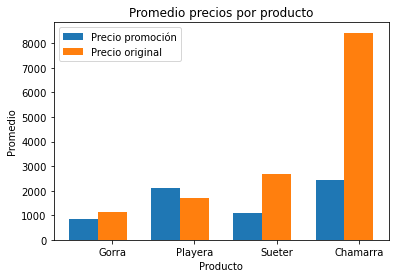

In [92]:
serie_1 = [prom_gorras1,prom_playera1,prom_sueter1,prom_chamarras1]
serie_2 = [prom_gorras2,prom_playera2,prom_sueter2,prom_chamarras2]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
 
plt.bar(indice_barras, serie_2, width=ancho_barras, label='Precio promoción')
plt.bar(indice_barras + ancho_barras, serie_1, width=ancho_barras, label='Precio original')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('Gorra', 'Playera', 'Sueter', 'Chamarra'))
 
plt.ylabel('Promedio')
plt.xlabel('Producto')
plt.title('Promedio precios por producto')
 
plt.show()

## SEARS

In [93]:
#Separamos por producto SEARS
df_gorras_sears=ps.sqldf("SELECT * FROM df_sears WHERE marca = 'gorra'")
df_playera_sears=ps.sqldf("SELECT * FROM df_sears WHERE marca = 'playera'")
df_sueter_sears=ps.sqldf("SELECT * FROM df_sears WHERE marca = 'sueter'")
df_chamarra_sears=ps.sqldf("SELECT * FROM df_sears WHERE marca = 'chamarra'")

In [94]:
#promedios por producto de precio2
prom_gorras = df_gorras_sears["precio2"].mean()
prom_playera = df_playera_sears["precio2"].mean()
prom_sueter = df_sueter_sears["precio2"].mean()
prom_chamarra = df_chamarra_sears["precio2"].mean()

### Precio promedio por artículo SEARS

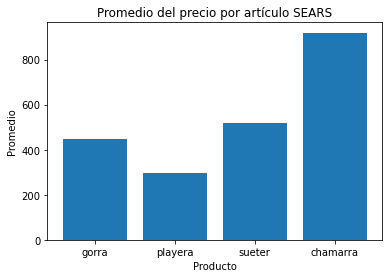

In [95]:
eje_x = ['gorra', 'playera', 'sueter', 'chamarra']
eje_y = [prom_gorras,prom_playera,prom_sueter,prom_chamarra]
plt.bar(eje_x, eje_y)
plt.ylabel('Promedio')
plt.xlabel('Producto')
plt.title('Promedio del precio por artículo SEARS')
plt.show()

## SHEIN

In [96]:
#Separamos por producto SHEIN
df_gorras_shein=ps.sqldf("SELECT * FROM df_shein WHERE Producto = 'gorra'")
df_playera_shein=ps.sqldf("SELECT * FROM df_shein WHERE Producto = 'playera'")
df_sueter_shein=ps.sqldf("SELECT * FROM df_shein WHERE Producto = 'sueter'")
df_chamarra_shein=ps.sqldf("SELECT * FROM df_shein WHERE Producto = 'chamarra'")

In [97]:
#promedios productos PALACIO DE HIERRO
#promedios por producto de Precio1
prom_gorras_shein1 = df_gorras_shein["Precio1"].mean()
prom_playera_shein1 = df_playera_shein["Precio1"].mean()
prom_sueter_shein1 = df_sueter_shein["Precio1"].mean()
prom_chamarras_shein1 = df_chamarra_shein["Precio1"].mean()

#promedios por producto de Precio2
prom_gorras_shein2 = df_gorras_shein["Precio2"].mean()
prom_playera_shein2 = df_playera_shein["Precio2"].mean()
prom_sueter_shein2 = df_sueter_shein["Precio2"].mean()
prom_chamarras_shein2 = df_chamarra_shein["Precio2"].mean()

### Precio promedio por artículo SHEIN

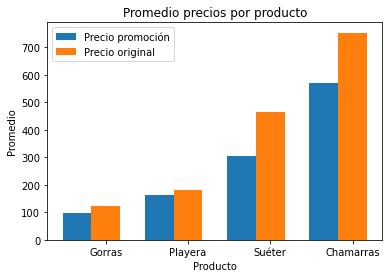

In [98]:


serie_3 = [prom_gorras_shein1,prom_playera_shein1,prom_sueter_shein1,prom_chamarras_shein1]
serie_4 = [prom_gorras_shein2,prom_playera_shein2,prom_sueter_shein2,prom_chamarras_shein2]
 
 
numero_de_grupos_shein = len(serie_1)
indice_barras_shein = np.arange(numero_de_grupos_shein)
ancho_barras_shein =0.35
 
plt.bar(indice_barras_shein, serie_4, width=ancho_barras_shein, label='Precio promoción')
plt.bar(indice_barras_shein + ancho_barras_shein, serie_3, width=ancho_barras_shein, label='Precio original')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras_shein + ancho_barras_shein, ('Gorras', 'Playera', 'Suéter', 'Chamarras'))
 
plt.ylabel('Promedio')
plt.xlabel('Producto')
plt.title('Promedio precios por producto')
 
plt.show()